In [1]:
import nltk                         # NLP toolbox
from os import getcwd
import pandas as pd                 # Library for Dataframes 
from nltk.corpus import twitter_samples 
import matplotlib.pyplot as plt     # Library for visualization
import numpy as np                  # Library for math functions

from utils import process_tweet, build_freqs

In [2]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets + all_negative_tweets ## Concatenate the lists. 
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)

train_pos = all_positive_tweets[:4000]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg

print("Number of tweets: ", len(train_x))

Number of tweets:  8000


In [3]:
data = pd.read_csv('C:\Yedek\Dosyalar\stuff\ders\csv files\logistic_features.csv');
data.head()

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0


In [4]:
X = data[['bias', 'positive', 'negative']].values
Y = data['sentiment'].values

print(X.shape)
print(X)

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


In [5]:
theta = [6.03518871e-08, 5.38184972e-04, -5.58300168e-04]

Text(0, 0.5, 'Negative')

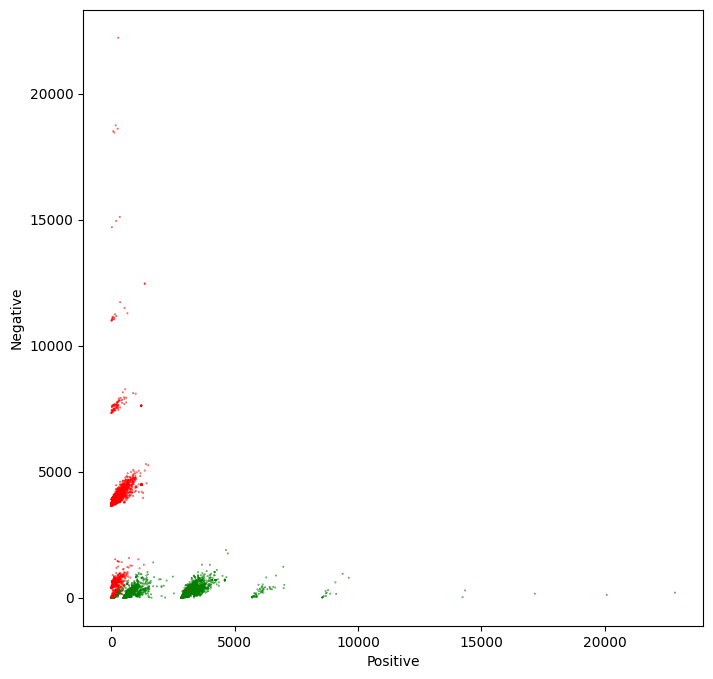

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
colors = ['red', 'green']

ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)
plt.xlabel('Positive')
plt.ylabel('Negative')

In [9]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (-w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]

In [1]:
fig, ax = plt.subplots(figsize = (8,8))
colors = ['red', 'green']

ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)
plt.xlabel('Positive')
plt.ylabel('Negative')

maxpos = np.max(X[:,1])
offset = 5000;

ax.plot([0, maxpos], [neg(theta, 0), neg(theta, maxpos)], color = 'gray')

ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width = 500, head_length = 500, fc = 'g', ec = 'g')
ax.arrow(offset, neg(theta, offset), offset, -direction(theta, offset), head_width = 500, head_length = 500, fc = 'r', ec = 'r')

plt.show()

NameError: name 'plt' is not defined